Kaggle DIGIT RECOGNITION competition

1. Load and explore training data. Info from Kaggle: 

File: train.csv

The training data set, (train.csv), has 785 columns. The first column, called "label", is the digit that was drawn by the user. The rest of the columns contain the pixel-values of the associated image.

Each pixel column in the training set has a name like pixelx, where x is an integer between 0 and 783, inclusive. To locate this pixel on the image, suppose that we have decomposed x as x = i * 28 + j, where i and j are integers between 0 and 27, inclusive. Then pixelx is located on row i and column j of a 28 x 28 matrix, (indexing by zero).

In [63]:
import numpy as np
import scipy as sc
#import sklearn

%matplotlib inline
import matplotlib.pyplot as plt
import pandas

from pandas import DataFrame
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.multiclass import OneVsRestClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from PIL import Image


In [2]:
# Constants definition
imageShape = (28,28)
imagePixels = imageShape[0]*imageShape[1]

In [3]:
# Limitamos a 5000 filas para las primeras pruebas
data = np.genfromtxt ('train.csv', delimiter=",", skip_header=1) #, max_rows = 5000
data.shape

(42000L, 785L)

In [4]:
data[:5,:10]

array([[ 1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 4.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.]])

(28L, 28L)

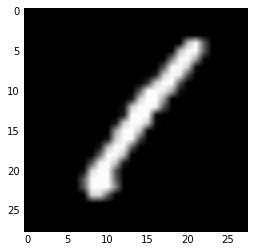

In [5]:
# Show the first image
image1 = np.reshape(data[0,1:],imageShape)
imgplot = plt.imshow(image1, cmap='gray')
image1.shape

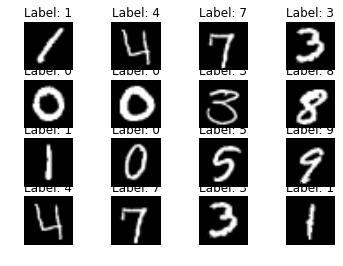

In [6]:
# Show first 4x4 images
f, axarr = plt.subplots(4,4)
for i in range(0,4):
    for j in range(0,4):
        im = np.reshape(data[i+3*j,1:], imageShape)
        axarr[i,j].imshow(im, cmap='gray')
        axarr[i,j].set_title('Label: ' + str(int(data[i+3*j,0])))
        axarr[i,j].axis('off')


[4132L, 4684L, 4177L, 4351L, 4072L, 3795L, 4137L, 4401L, 4063L, 4188L]

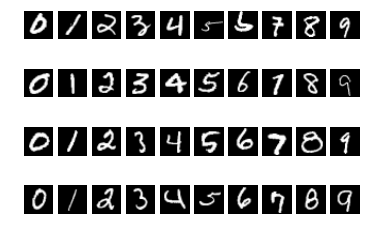

In [7]:
# Sort and show images by labels

dataarranged = data[data[:, 0].argsort()]
samplesbylabel = [];

# Show first 4x4 images
f, axarr = plt.subplots(4,10)
for i in range(0,10):
    for j in range(0,4):
        subdata = dataarranged[dataarranged[:,0] == i,:]
        im = np.reshape(subdata[j,1:], imageShape)
        axarr[j,i].imshow(im, cmap='gray')
        #axarr[i,j].set_title('Tag: ' + str(int(dataarranged[i+3*j,0])))
        axarr[j,i].axis('off')
        
    samplesbylabel.append(subdata.shape[0])
    
samplesbylabel # number of samples by label

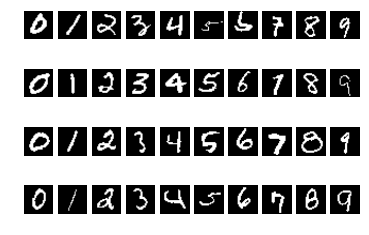

In [8]:
# Binarize images
threshold = 128
ylabels = dataarranged[:,0]
binim = dataarranged[:,1:] > threshold 
ylabels.shape
binimages = np.column_stack((ylabels, binim ))

#Show
f, axarr = plt.subplots(4,10)
for i in range(0,10):
    for j in range(0,4):
        subdata = binimages[binimages[:,0] == i,:]
        im = np.reshape(subdata[j,1:], imageShape)
        axarr[j,i].imshow(im, cmap='gray')
        #axarr[i,j].set_title('Tag: ' + str(int(dataarranged[i+3*j,0])))
        axarr[j,i].axis('off')

In [9]:
# Train test split
X = binim
y = ylabels
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)
[X_train.shape, X_test.shape, y_train.shape, y_test.shape]

[(29400L, 784L), (12600L, 784L), (29400L,), (12600L,)]

In [10]:
# Define and train model
classif = OneVsRestClassifier(MLPClassifier(hidden_layer_sizes=(10,10 ),alpha=1, verbose=0))
classif.fit(X_train, y_train)
y_pred = classif.predict(X_test)
print("Training set score: %f" % classif.score(X_train, y_train))


Training set score: 0.970306


In [11]:
print("Testing set score: %f" % accuracy_score(y_test, y_pred))


Testing set score: 0.956032


In [12]:
confusion_matrix(y_test, y_pred)

array([[1211,    0,    2,    2,    0,    4,    9,    0,    9,    3],
       [   0, 1383,    3,    4,    2,    3,    1,    0,    8,    1],
       [  16,    7, 1185,    9,    4,    0,    4,   17,    8,    3],
       [   2,    4,   12, 1228,    0,   28,    4,    2,   19,    6],
       [   2,    9,    4,    0, 1162,    0,   10,    1,    5,   29],
       [   8,    6,    1,   12,    4, 1085,    6,    1,   10,    6],
       [  12,    3,    4,    0,    2,   13, 1205,    0,    2,    0],
       [   5,   10,    9,    6,    9,    2,    0, 1258,    2,   19],
       [   5,    9,    4,   12,    4,   16,    8,    2, 1149,   10],
       [   5,    3,    1,   11,   23,    6,    1,   15,   11, 1180]])

Let's try some improvements

[3, 23, 6, 22]

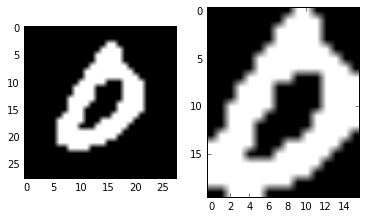

In [95]:
f, ax = plt.subplots(1,2)
ax.shape
image1 = np.reshape(binim[0,:],imageShape)
ax[0].imshow(image1, cmap='gray')
indy,indx = np.nonzero(image1)
subzone = [min(indy), max(indy)+1, min(indx), max(indx)+1]
subimage = image1[subzone[0]:subzone[1], subzone[2]: subzone[3]]
ax[1].imshow(subimage, cmap='gray')
init = np.array([subzone[0], subzone[2]])
subzone


In [61]:
def setDigitInStandardImage(digitImage, stdDimensions, insertionPt):
    dimImage = digitImage.shape
    outImage = np.zeros(stdDimensions)
    outImage[insertionPt[0]:insertionPt[0]+dimImage[0],insertionPt[1]:insertionPt[1]+dimImage[1]] = digitImage
    return outImage

In [105]:
def imresizeAndRotate(im,sz,ang):
    """  Resize and rotate an image array using PIL. """
    pil_im = Image.fromarray(np.uint8(im))
    pil_im = pil_im.resize(sz, resample=Image.BILINEAR)
    return np.array(pil_im.rotate(ang))

array([16, 20], dtype=int64)

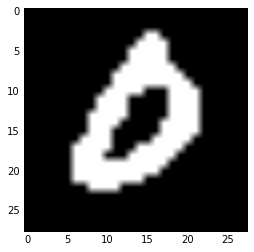

In [110]:

currentShape = np.array([subimage.shape[1],subimage.shape[0]])
currentIm = imresizeAndRotate(subimage, currentShape, 0)


imTest = setDigitInStandardImage(currentIm, [28,28], init)
imgplot = plt.imshow(imTest, cmap='gray')
currentShape